# Building a Machine Learning Model Step by Step with the Titanic Dataset

RMS Titanic sank on 15 April 1912 in the North Atlantic Ocean, when struck an iceberg. There were 2,224 passengers on board and this disaster resulted in the deaths of more than 1,500 people.
In this project, I will analyze the factors which are important for the survival ratio by using data visualization. After some feature engineering, I will build a machine learning model to predict survived passengers.

### 1. Importing data and libaries

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 2. Data sets

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.shape

(891, 12)

In [6]:
test_data.shape

(418, 11)

We have two data sets that are train and test data sets. Our train data set has 11 features excluding the target column (survived).

In [7]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

When we check the info of the train data and test data, we see dtype of features and non-null values in the columns. As we can see on the info of columns. There are missing values at Age, Cabin and Embarked columns of train data. In the test data, Age, Fare and Cabin columns has missing values. We will deal with them later.

### 3. Data exploration by visualizing

Let's analyze data by using some plots.

In [8]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


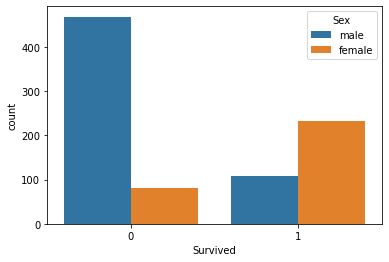

In [9]:
sns.countplot(train_data["Survived"], hue=train_data["Sex"])

When we look the gender vs surviving rates, results look interesting. Surviving ratio in females is much more than males'. According to this data, there is strong corrolation between survived and sex columns.

In [10]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


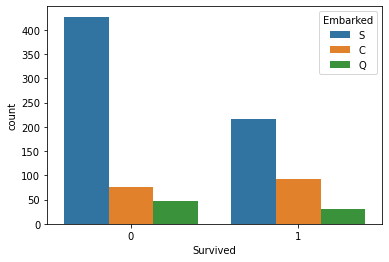

In [11]:
sns.countplot(train_data["Survived"], hue=train_data["Embarked"])

Embarked feature shows port of embarkation which are C = Cherbourg, Q = Queenstown, and S = Southampton.
According to table which shows surviving ratio regarding embarked feature, passengers embarked from Cherbourg have higher surviving ratio.

Pclass column involves 3 different values. 

1st = Upper
2nd = Middle
3rd = Lower

In [12]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


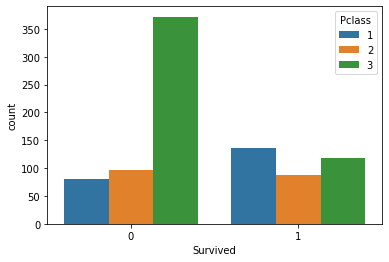

In [13]:
sns.countplot(train_data["Survived"], hue=train_data["Pclass"])

According to data set, class of passenger looks like important for surviving. Majority of passangers from upper class have survived. Large number of 3rd class did not survived. 

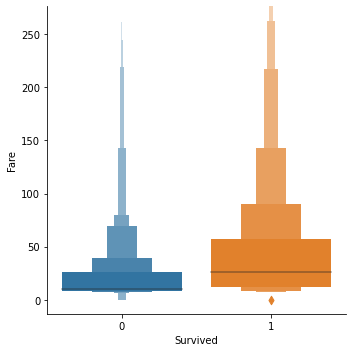

In [14]:
sns.catplot(x="Survived",y="Fare",data=train_data, kind="boxen")

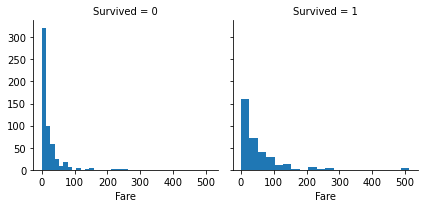

In [15]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

Ticket fares column is one of the numerical features. When we look the histogram and boxen graphs, we make couple of comments about correlation between fares and survival rates. 
<br>Average fare value for survived passangers much higer than not survived ones. Also histogram shows that most of the passengers have survived, who pay more than 100.
<br>This result is expected because we can guess that there should be correlation between pclass and fares.

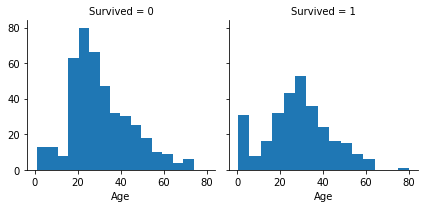

In [16]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=15)

When we plot histogram chart for the "age" which is another numerical feature, we can get some useful tips.
Children (Age<10) has high survival rates.Middle ages (25-35 years old) have surivived more than young ages (15-35 years old).

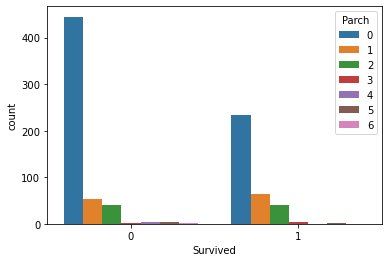

In [17]:
sns.countplot(train_data["Survived"], hue=train_data["Parch"])

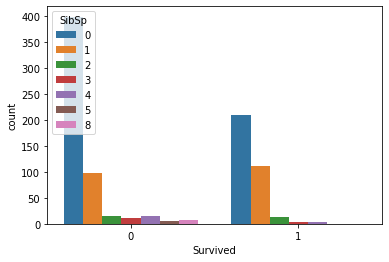

In [18]:
sns.countplot(train_data["Survived"], hue=train_data["SibSp"])

In [19]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Parch and SibSp features are related with the family connections. Parch is number of parents and children. SibSp is number of sblings and spouse. It looks like being single is not an advantage for surviving.

In [20]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


We can plot a graph to see the all correlations between numerical features. There are 2 similar functions for to create this plot.
One of them is pairplot from sns and the other one is plotting scatter_matrix from pandas.

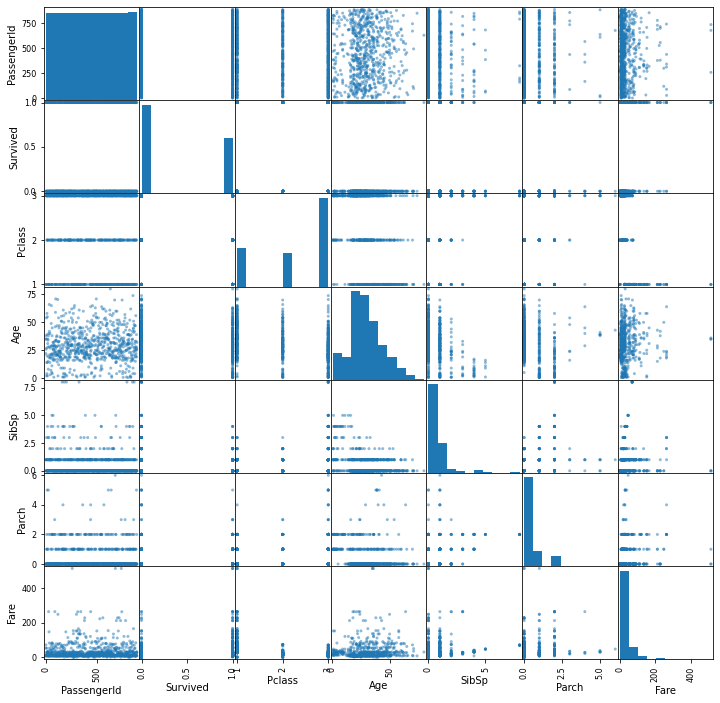

In [21]:
pd.plotting.scatter_matrix(train_data, figsize=(12,12));

Also we can use plot of data which is grouped according to survived column. We can again use this plot for quick look.

Survived
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

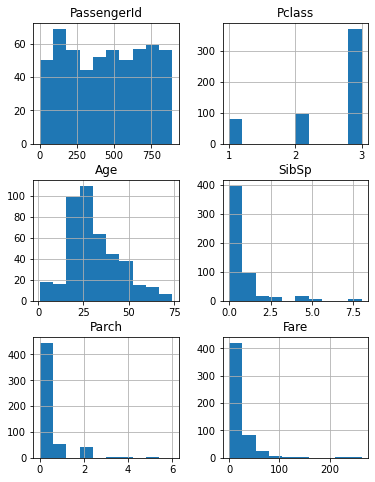

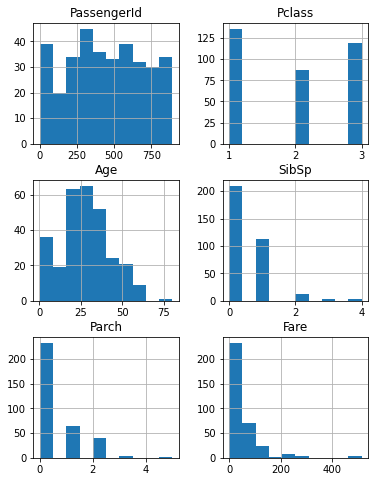

In [22]:
train_data.groupby(train_data["Survived"]).hist(figsize=(6,8))

Actually the best way to see the correlation between features is heatmap according to me. By using corr from pandas and heatmap from sns functions, we can have very clear idea about the correlations for the numerical features.

In [23]:
cor=train_data.corr()
cor_target=abs(cor["Survived"]).sort_values(ascending=False)
cor_target

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64

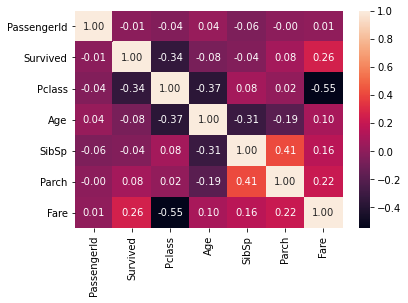

In [24]:
sns.heatmap(cor, annot=True, fmt=".2f")

As we can see on heat map there is very strong correlation between suriving and plcass and fare as I mentioned before. However, the correlation is also very strong between the pclass and fare. So, we may not have 2 different features actually.
<br>We know that sex feature has strong correlation too, however it is not in heatmap because it is not numerical.

### 4. Feature engineering and Modelling

We will start with random forest classification model for this data set. Its nonlinear nature makes it usually a great option for not only classification but also regression problems.
<br> We will start with numerical features to create our machine learning model at the beginning.

In [25]:
X=train_data[["Pclass", "Age", "SibSp", "Parch", "Fare"]]
y=train_data["Survived"]

We split our data set into two parts which are train and test sets. It is neccessary to check the model's accuracy. Using only one data set may result in overfitting problem.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

It doesn't work because we need to complete missing values before the deploying of model.

In [28]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [29]:
train_data["Age"].fillna(train_data["Age"].mean(), inplace=True)
test_data["Age"].fillna(test_data["Age"].mean(), inplace=True)
test_data["Fare"].fillna(test_data["Fare"].mean(), inplace=True)

NaN values are replaced with mean of column by using fillna method of pandas in both train and test data.
<br> Now, we can deploy our model.

In [30]:
X=train_data[["Pclass", "Age", "SibSp", "Parch", "Fare"]]
y=train_data["Survived"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
rfc=RandomForestClassifier(random_state=35)
rfc.fit(X_train, y_train)

print("test accuracy: ",rfc.score(X_test,y_test))

test accuracy:  0.6604477611940298


We could reach the 68% By using only numerical features. We will try to increase our accuracy. We have some other features whose data type is object. These features also have some correlation with surviving that we already saw in previous part.
<br> We have convert our string values to some numerical ones. There are 2 main methods here. First method is one hot encoding which create a column for each unique value and fill these columns with binary codes 1 and 0. The other one is label encoding that replace every unique string value with unique number.
<br> Both pandas and sckit learn have functions for this process. One hot encoding is possible with pandas.get_dummies and 
sklearn.preprocessing.OneHotEncoder. For label encoding, we can use pandas.factorize and sklearn.preprocessing.LabelEncoder functions. We will use pandas.factorize here.

In [33]:
train_data["Sex_encoded"]=pd.factorize(train_data["Sex"])[0]
train_data["Embarked_encoded"]=pd.factorize(train_data["Embarked"])[0]

test_data["Sex_encoded"]=pd.factorize(test_data["Sex"])[0]
test_data["Embarked_encoded"]=pd.factorize(test_data["Embarked"])[0]

In [34]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               891 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             204 non-null    object 
 11  Embarked          889 non-null    object 
 12  Sex_encoded       891 non-null    int64  
 13  Embarked_encoded  891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data col

We do not need to replace null values in embarked column in train data. Because pandas factorize function encodes null values separately. We could fill the null values with mode value then use encode function however we did in this way.

In [35]:
train_data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [36]:
train_data["Embarked_encoded"].unique()

array([ 0,  1,  2, -1])

Now, we can try one more time to deploy our model with new features.

In [37]:
X=train_data[["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex_encoded", "Embarked_encoded"]]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
rfc=RandomForestClassifier(random_state=35)
rfc.fit(X_train, y_train)

print("test accuracy: ",rfc.score(X_test,y_test))

test accuracy:  0.7910447761194029


As we can see there is increase in accuracy which is almost 10%.

We can add one more feature to our data set, that is cabin column. However, it looks like it is not possible by using panda factorize function directly because there are too many different values. Firstly, we will try to acquire only deck codes.
<br> Firstly, we complete null values then we take only first letter of each row by using str.slice function from pandas. By this way, we can acquire cabin codes.

In [40]:
train_data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [41]:
train_data["Cabin"].fillna("N", inplace=True)
train_data['Cabin_code'] = train_data["Cabin"].str.slice(0,1)
train_data['Cabin_code'].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [42]:
test_data["Cabin"].fillna("N", inplace=True)
test_data['Cabin_code'] = test_data["Cabin"].str.slice(0,1)

In [43]:
train_data["Cabin_code_encoded"]=pd.factorize(train_data["Cabin_code"])[0]

test_data["Cabin_code_encoded"]=pd.factorize(test_data["Cabin_code"])[0]

In [44]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Name                891 non-null    object 
 4   Sex                 891 non-null    object 
 5   Age                 891 non-null    float64
 6   SibSp               891 non-null    int64  
 7   Parch               891 non-null    int64  
 8   Ticket              891 non-null    object 
 9   Fare                891 non-null    float64
 10  Cabin               891 non-null    object 
 11  Embarked            889 non-null    object 
 12  Sex_encoded         891 non-null    int64  
 13  Embarked_encoded    891 non-null    int64  
 14  Cabin_code          891 non-null    object 
 15  Cabin_code_encoded  891 non-null    int64  
dtypes: float

We can use also this feature to train our model.

In [45]:
X=train_data[["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex_encoded", "Embarked_encoded", "Cabin_code_encoded"]]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
rfc=RandomForestClassifier(random_state=35)
rfc.fit(X_train, y_train)

print("test accuracy: ",rfc.score(X_test,y_test))

test accuracy:  0.7910447761194029


Adding new feature to our X data set did not change the accuracy.

Random forest is a tree-based model so it doesn't require feature scaling. Even it can soften non-linear nature of the model. It is expected that result will be same after feature scaling. We can try and see.

In [48]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

In [49]:
rfc=RandomForestClassifier(random_state=35)
rfc.fit(X_train_sc, y_train)
print("train accuracy: ",rfc.score(X_train_sc, y_train))
print("test accuracy: ",rfc.score(X_test_sc,y_test))

train accuracy:  0.9823434991974318
test accuracy:  0.7910447761194029


As you can see, the test accuracy is same before and after feature scaling (79.1%). So, standardization of features did not help to increase accuracy as we expected.

When we look at the train and test accuracies, we can see that the difference between train accuracy is not too small. It can not be called overfitting but still we can try to decrease the gap between accuracies.

If we try to fit our model to each feature column, it can give us a insight about which columns cause this slight overfitting.

In [50]:
rfc=RandomForestClassifier(random_state=35)
for x in X_train.columns:
    
    rfc.fit(X_train[[x]], y_train)
    print(x,"train accuracy: ",rfc.score(X_train[[x]], y_train)*100)
    print(x,"test accuracy: ",rfc.score(X_test[[x]],y_test)*100)

Pclass train accuracy:  67.25521669341894
Pclass test accuracy:  69.40298507462687
Age train accuracy:  70.46548956661316
Age test accuracy:  54.1044776119403
SibSp train accuracy:  62.92134831460674
SibSp test accuracy:  58.582089552238806
Parch train accuracy:  64.84751203852326
Parch test accuracy:  58.95522388059702
Fare train accuracy:  80.73836276083468
Fare test accuracy:  70.1492537313433
Sex_encoded train accuracy:  78.49117174959872
Sex_encoded test accuracy:  79.1044776119403
Embarked_encoded train accuracy:  65.32905296950241
Embarked_encoded test accuracy:  60.447761194029844
Cabin_code_encoded train accuracy:  70.14446227929373
Cabin_code_encoded test accuracy:  67.91044776119402


We can make some comment on these results. 
Sex columns is the most important feature for our model, only itself has 79% test accuracy. And it also has almost same train and test accuracy which is very ideal stuation.
While the difference between train and test accuracies are very little for some features, especially numerical features such as age and fare have bigger difference.

We can change the Age and Fare features from numerical to label encoded to increase the efficiency of the model.

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

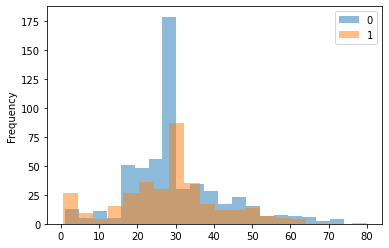

In [51]:
train_data["Age"].groupby(train_data["Survived"]).plot(kind="hist", bins=20, legend=True, alpha=0.5)

In [52]:
train_data.loc[train_data['Age'] <= 7.5, 'Age_encoded'] = 0
train_data.loc[(train_data['Age'] > 7.5) & (train_data['Age'] <= 15), 'Age_encoded'] = 1
train_data.loc[(train_data['Age'] > 15) & (train_data['Age'] <= 25), 'Age_encoded'] = 2
train_data.loc[(train_data['Age'] > 25) & (train_data['Age'] <= 30), 'Age_encoded'] = 3
train_data.loc[(train_data['Age'] > 30) & (train_data['Age'] <= 35), 'Age_encoded'] = 4
train_data.loc[(train_data['Age'] > 35) & (train_data['Age'] <= 50), 'Age_encoded'] = 5
train_data.loc[train_data['Age'] > 50, 'Age_encoded'] = 6
train_data["Age_encoded"].unique()

array([2., 5., 3., 4., 6., 0., 1.])

In [53]:
test_data.loc[test_data['Age'] <= 7.5, 'Age_encoded'] = 0
test_data.loc[(test_data['Age'] > 7.5) & (test_data['Age'] <= 15), 'Age_encoded'] = 1
test_data.loc[(test_data['Age'] > 15) & (test_data['Age'] <= 25), 'Age_encoded'] = 2
test_data.loc[(test_data['Age'] > 25) & (test_data['Age'] <= 30), 'Age_encoded'] = 3
test_data.loc[(test_data['Age'] > 30) & (test_data['Age'] <= 35), 'Age_encoded'] = 4
test_data.loc[(test_data['Age'] > 35) & (test_data['Age'] <= 50), 'Age_encoded'] = 5
test_data.loc[test_data['Age'] > 50, 'Age_encoded'] = 6
test_data["Age_encoded"].unique()

array([4., 5., 6., 3., 2., 1., 0.])

In [54]:
train_data[['Age_encoded', 'Survived']].groupby(['Age_encoded'], as_index=False).mean()

,Age_encoded,Survived
0,0.0,0.680000
1,1.0,0.454545
2,2.0,0.344037
3,3.0,0.329825
4,4.0,0.465909
5,5.0,0.398693
6,6.0,0.343750


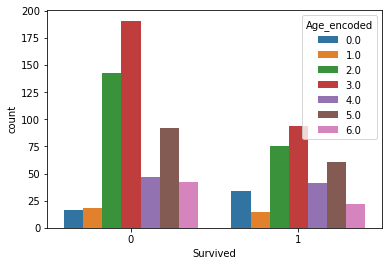

In [55]:
sns.countplot(train_data["Survived"], hue=train_data["Age_encoded"])

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

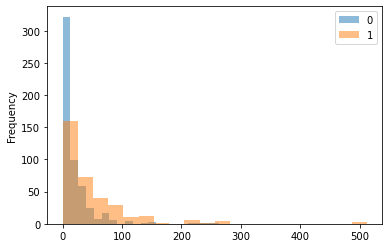

In [56]:
train_data["Fare"].groupby(train_data["Survived"]).plot(kind="hist", bins=20, legend=True, alpha=0.5)

In [57]:
train_data.loc[train_data['Fare'] <= 12.5, 'Fare_encoded'] = 0
train_data.loc[(train_data['Fare'] > 12.5) & (train_data['Fare'] <= 25), 'Fare_encoded'] = 1
train_data.loc[(train_data['Fare'] > 25) & (train_data['Fare'] <= 50), 'Fare_encoded'] = 2
train_data.loc[(train_data['Fare'] > 50) & (train_data['Fare'] <= 75), 'Fare_encoded'] = 3
train_data.loc[(train_data['Fare'] > 75) & (train_data['Fare'] <= 100), 'Fare_encoded'] = 4
train_data.loc[(train_data['Fare'] > 100) & (train_data['Fare'] <= 150), 'Fare_encoded'] = 5
train_data.loc[train_data['Fare'] > 150, 'Fare_encoded'] = 6
train_data["Fare_encoded"].unique()

array([0., 3., 1., 2., 6., 5., 4.])

In [58]:
test_data.loc[test_data['Fare'] <= 12.5, 'Fare_encoded'] = 0
test_data.loc[(test_data['Fare'] > 12.5) & (test_data['Fare'] <= 25), 'Fare_encoded'] = 1
test_data.loc[(test_data['Fare'] > 25) & (test_data['Fare'] <= 50), 'Fare_encoded'] = 2
test_data.loc[(test_data['Fare'] > 50) & (test_data['Fare'] <= 75), 'Fare_encoded'] = 3
test_data.loc[(test_data['Fare'] > 75) & (test_data['Fare'] <= 100), 'Fare_encoded'] = 4
test_data.loc[(test_data['Fare'] > 100) & (test_data['Fare'] <= 150), 'Fare_encoded'] = 5
test_data.loc[test_data['Fare'] > 150, 'Fare_encoded'] = 6
test_data["Fare_encoded"].unique()

array([0., 2., 1., 4., 3., 6., 5.])

In [59]:
train_data[['Fare_encoded', 'Survived']].groupby(['Fare_encoded'], as_index=False).mean()

,Fare_encoded,Survived
0,0.0,0.232376
1,1.0,0.408046
2,2.0,0.419540
3,3.0,0.555556
4,4.0,0.795455
5,5.0,0.791667
6,6.0,0.689655


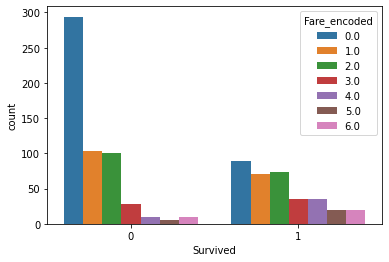

In [60]:
sns.countplot(train_data["Survived"], hue=train_data["Fare_encoded"])

As you can see the above, Age and Fare columns were converted to discrete values from continous ones. I tried to determine critical points and cut the features from those points. I did it manually but there some functions for it in pandas. These are cut and qcut funcitons. They cut the values according to values and frequencies respectively.

Now, we can try our model with the new features.

In [61]:
X=train_data[["Pclass", "Age_encoded", "SibSp", "Parch", "Fare_encoded", "Sex_encoded", "Embarked_encoded", "Cabin_code_encoded"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
rfc=RandomForestClassifier(random_state=35)
rfc.fit(X_train, y_train)
print("train accuracy: ",rfc.score(X_train, y_train))
print("test accuracy: ",rfc.score(X_test,y_test))

train accuracy:  0.9197431781701445
test accuracy:  0.7873134328358209


Our previous train and test accuracies were 98.2% and 79.1 respecitively. Now train accuracy is 92.0% and test accuracy is 78.7%. It decreased the gap between train and test accuracies, however did not help to increase the test accuracy.

### 5. Hyperparameter Tuning

Now, we have model and final data set. Our model has many arguments (n_estimators, criterion, max_depth, min_samples_leaf, etc.) and we need to find the best values for this parameters. For this purpose, we won't try the parameters manually, we will try GridSearchCV and RandomizedSearchCV from sklearn and compare them.
<br> GridSearchCV is exhaustive search over specified parameters. It tries each combination in the grid of hyperparameter values and may take long time if we have large data set and too many hyperparamters. On the other hand, RandomizedSearchCV selects random combinations and mostly it finds best parameters in shorter time.

In [63]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time

In [64]:
rfc_parameters = { 
    'n_estimators': [100,200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,8,10],
    'criterion' :['gini', 'entropy'],
    'min_samples_split': [2, 4, 6]
}

In [65]:
start_time = time.time()

rand_search= RandomizedSearchCV(rfc, rfc_parameters, cv=5)
rand_search.fit(X_train, y_train)
print(rand_search.best_params_)
print("best accuracy :",rand_search.best_score_)

end_time = time.time()
print("Total execution time: {} seconds".format(end_time - start_time))

{'n_estimators': 200, 'min_samples_split': 6, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'entropy'}
best accuracy : 0.8314322580645161
Total execution time: 20.72016143798828 seconds


In [66]:
start_time = time.time()

grid_search= GridSearchCV(rfc, rfc_parameters, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print("best accuracy :",grid_search.best_score_)

end_time = time.time()
print("Total execution time: {} seconds".format(end_time - start_time))

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 6, 'n_estimators': 200}
best accuracy : 0.8314322580645161
Total execution time: 517.4340822696686 seconds


Best parameters and best accuracy values are determined by both random search and grid search. While the best accuracy is around 83% in both of them, cost of the grid search is much higher. There are difference which is more than ten times in the total execuiton times. So, using random search algorithm is good decision in terms of both accuracy and cost.

### 6. Conclusion

In this article, we analyzed a data set in terms of all aspects then create machine learning model. Firstly, data is explored detailly to understand it by using plots. Then, data cleaning and manipulation is made step by step. A machine learning model is chosen and efficiency of model is checked in every step. Finally, hyperparameter tuning is made by both random search and grid search and these searching methods are compared in terms of efficiency.

### 7. Output

In [67]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         418 non-null    int64  
 1   Pclass              418 non-null    int64  
 2   Name                418 non-null    object 
 3   Sex                 418 non-null    object 
 4   Age                 418 non-null    float64
 5   SibSp               418 non-null    int64  
 6   Parch               418 non-null    int64  
 7   Ticket              418 non-null    object 
 8   Fare                418 non-null    float64
 9   Cabin               418 non-null    object 
 10  Embarked            418 non-null    object 
 11  Sex_encoded         418 non-null    int64  
 12  Embarked_encoded    418 non-null    int64  
 13  Cabin_code          418 non-null    object 
 14  Cabin_code_encoded  418 non-null    int64  
 15  Age_encoded         418 non-null    float64
 16  Fare_enc

In [68]:
X_test_final=test_data[["Pclass", "Age_encoded", "SibSp", "Parch", "Fare_encoded", "Sex_encoded", "Embarked_encoded", "Cabin_code_encoded"]]

In [69]:
prediction=rand_search.best_estimator_.predict(X_test_final)
output = pd.DataFrame({'PassengerId': test_data["PassengerId"], 'Survived': prediction})
output.to_csv('submission.csv', index=False)